# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [4]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [5]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Removing non-essential rows and columns

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6144,1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195


In [9]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENPY'
svenpy_cols = [col for col in data.columns if col.startswith('SVENPY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + svenpy_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()


,Date,BETA0,BETA1,BETA2,SVENPY01,SVENPY02,SVENPY03,SVENPY04,SVENPY05,SVENPY06,...,SVENPY21,SVENPY22,SVENPY23,SVENPY24,SVENPY25,SVENPY26,SVENPY27,SVENPY28,SVENPY29,SVENPY30
6144,1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.3058,10.1846,10.7399,11.0937,11.3222,11.4724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.3534,10.2063,10.7325,11.0636,11.2775,11.4201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.3305,10.2187,10.7583,11.0936,11.3082,11.4508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.2907,10.1575,10.6742,10.9906,11.1917,11.3254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data2.shape

(10529, 34)

# Data overview

## Plotting variables 

In [11]:
plot_data =data2

# Rename SVENPY columns by stripping the prefix
plot_data.rename(columns=lambda col: col[6:] if col.startswith('SVENPY') else col, inplace=True)

# Optional: convert new column names from strings like '01' to integers
plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)

# Check the new column names
print(plot_data.columns)

Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'],
      dtype='object')


/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_39254/3773840932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns=lambda col: col[6:] if col.startswith('SVENPY') else col, inplace=True)
/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_39254/3773840932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)


In [15]:
import matplotlib.pyplot as plt

# Histogram plotting function, you can adjust the bins

def plot_histogram(column_name, bins=30):
    if column_name not in plot_data.columns:
        print(f"Column '{column_name}' not found in data.")
        return

    plt.figure(figsize=(6, 4))
    plt.hist(plot_data[column_name].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


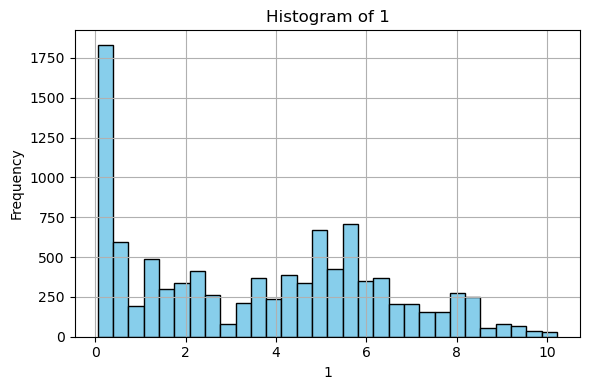

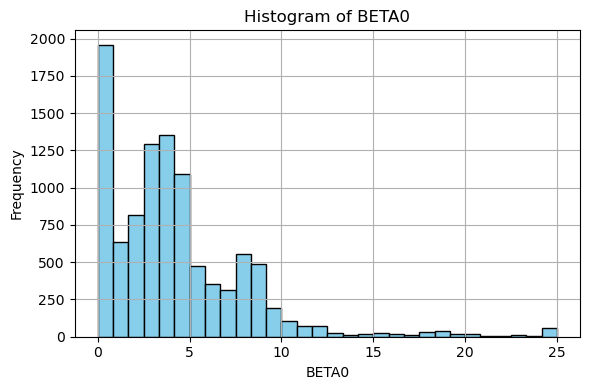

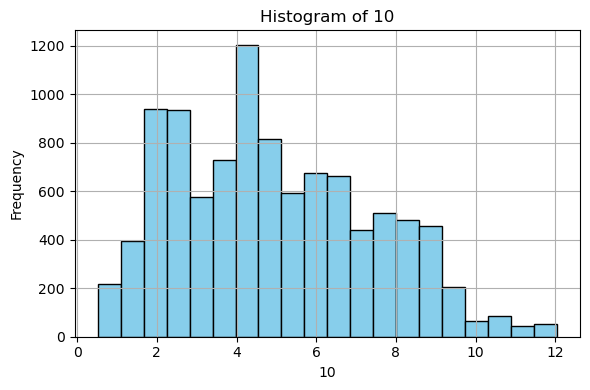

In [16]:
plot_histogram('1')         # Histogram for maturity 1
plot_histogram('BETA0')     # Histogram for BETA0
plot_histogram('10', bins=20)  # Histogram for maturity 10 with 20 bins

## Plotting yield curve for one maturity

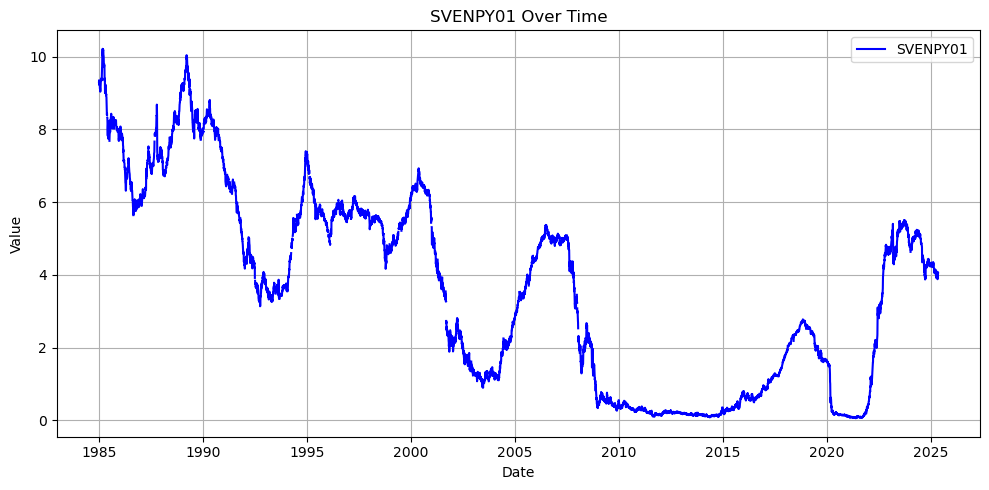

In [17]:
# Plot column '1' against Date
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Date'], plot_data['1'], label='SVENPY01', color='blue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SVENPY01 Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## 3d plot of yield curve

/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_39254/2336497114.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


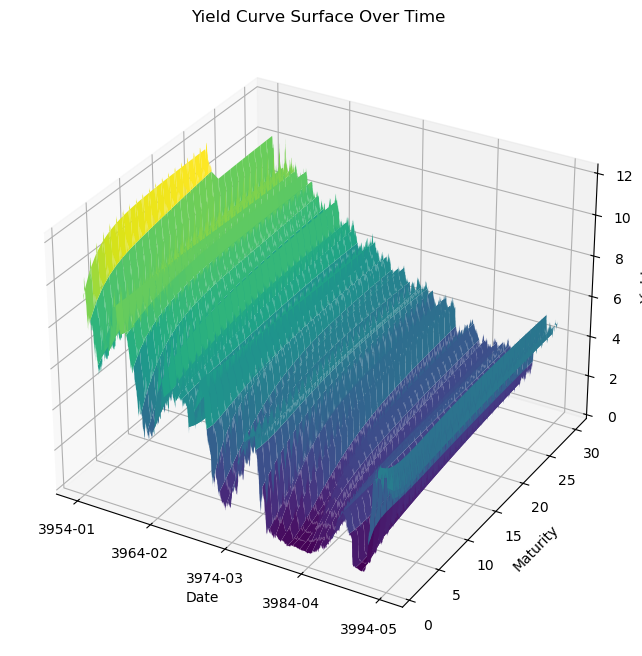

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Ensure Date is in numeric format for plotting (convert to ordinal)
X = plot_data['Date'].map(pd.Timestamp.toordinal).values  # shape: (n_dates,)

# Get the maturity columns, assume they are all digit strings
maturity_cols = sorted([col for col in plot_data.columns if col.isdigit()], key=lambda x: int(x))
Y = np.array([int(m) for m in maturity_cols])  # shape: (n_maturities,)

# Get Z values (yield values): shape should be (n_dates, n_maturities)
Z = plot_data[maturity_cols].values  # shape: (n_dates, n_maturities)

# Create meshgrid for Date (X) and Maturity (Y)
X_mesh, Y_mesh = np.meshgrid(X, Y, indexing='ij')  # X: dates, Y: maturities

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis')

# Format axes
ax.set_xlabel('Date')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')
ax.set_title('Yield Curve Surface Over Time')

# Optional: Format date ticks
from matplotlib.dates import num2date
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_xticklabels([num2date(t).strftime('%Y-%m') for t in np.linspace(X.min(), X.max(), 5)])

plt.tight_layout()
plt.show()